# color with hsv

HSL (hue, saturation, lightness) and HSV (hue, saturation, value) are alternative representations of the RGB color model. 

Code snippets and ideas from https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/



In [19]:
from sklearn.cluster import KMeans
from collections import Counter
import cv2
import numpy as np
import json
import glob
import matplotlib.pyplot as plt

In [39]:
def get_dominant_color(image, k=4, image_processing_size = (25, 25)):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input


    """
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
    dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]

    return list(dominant_color_1), list(dominant_color_2), list(dominant_color_3)


Most prominent color:
red: 10  green:  13  blue:  15 
Hex:  #0a0d0f

Second color:
red: 217  green:  13  blue:  199 
Hex:  #d9d2c7

Third color:
red: 8  green:  13  blue:  15 
Hex:  #080d0f


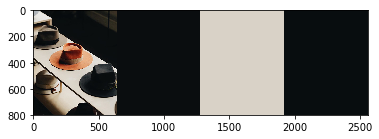


Most prominent color:
red: 231  green:  231  blue:  235 
Hex:  #e7e7eb

Second color:
red: 203  green:  231  blue:  209 
Hex:  #cbcfd1

Third color:
red: 169  green:  231  blue:  138 
Hex:  #a99b8a


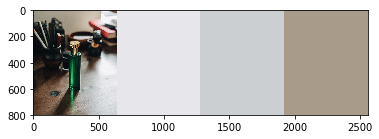


Most prominent color:
red: 213  green:  217  blue:  221 
Hex:  #d5d9dd

Second color:
red: 205  green:  217  blue:  215 
Hex:  #cdd2d7

Third color:
red: 198  green:  217  blue:  207 
Hex:  #c6cbcf


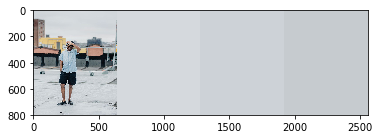


Most prominent color:
red: 62  green:  92  blue:  96 
Hex:  #3e5c60

Second color:
red: 66  green:  92  blue:  94 
Hex:  #425a5e

Third color:
red: 54  green:  92  blue:  82 
Hex:  #364f52


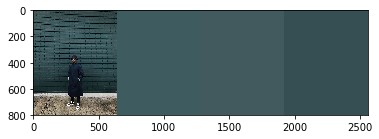


Most prominent color:
red: 189  green:  104  blue:  74 
Hex:  #bd684a

Second color:
red: 176  green:  104  blue:  62 
Hex:  #b05c3e

Third color:
red: 193  green:  104  blue:  56 
Hex:  #c16138


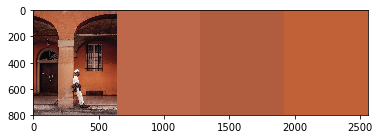


Most prominent color:
red: 182  green:  179  blue:  167 
Hex:  #b6b3a7

Second color:
red: 183  green:  179  blue:  175 
Hex:  #b7b6af

Third color:
red: 171  green:  179  blue:  155 
Hex:  #aba89b


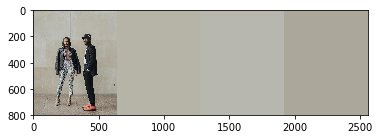


Most prominent color:
red: 216  green:  197  blue:  181 
Hex:  #d8c5b5

Second color:
red: 171  green:  197  blue:  154 
Hex:  #aba19a

Third color:
red: 185  green:  197  blue:  169 
Hex:  #b9b0a9


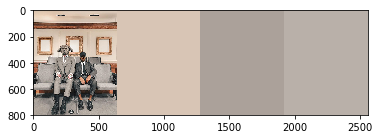


Most prominent color:
red: 175  green:  168  blue:  157 
Hex:  #afa89d

Second color:
red: 162  green:  168  blue:  144 
Hex:  #a29a90

Third color:
red: 169  green:  168  blue:  147 
Hex:  #a9a693


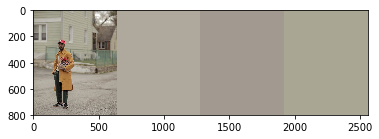


Most prominent color:
red: 49  green:  67  blue:  81 
Hex:  #314351

Second color:
red: 138  green:  67  blue:  61 
Hex:  #8a453d

Third color:
red: 40  green:  67  blue:  72 
Hex:  #283b48


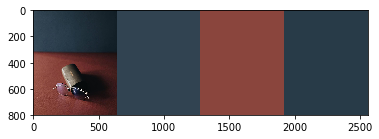


Most prominent color:
red: 0  green:  0  blue:  0 
Hex:  #000000

Second color:
red: 182  green:  0  blue:  64 
Hex:  #b69240

Third color:
red: 163  green:  0  blue:  52 
Hex:  #a37e34


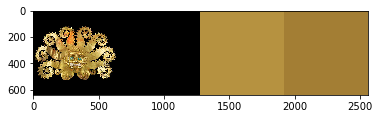


Most prominent color:
red: 229  green:  229  blue:  229 
Hex:  #e5e5e5

Second color:
red: 220  green:  229  blue:  220 
Hex:  #dcdcdc

Third color:
red: 240  green:  229  blue:  240 
Hex:  #f0f0f0


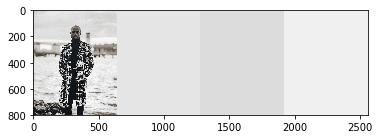


Most prominent color:
red: 204  green:  200  blue:  188 
Hex:  #ccc8bc

Second color:
red: 213  green:  200  blue:  197 
Hex:  #d5d0c5

Third color:
red: 222  green:  200  blue:  215 
Hex:  #dedcd7


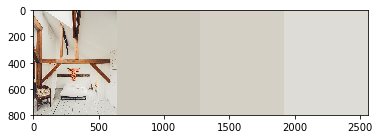


Most prominent color:
red: 193  green:  195  blue:  188 
Hex:  #c1c3bc

Second color:
red: 210  green:  195  blue:  206 
Hex:  #d2d3ce

Third color:
red: 214  green:  195  blue:  209 
Hex:  #d6d7d1


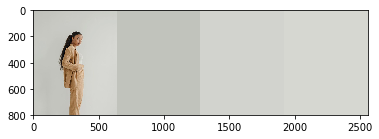


Most prominent color:
red: 90  green:  86  blue:  74 
Hex:  #5a564a

Second color:
red: 139  green:  86  blue:  113 
Hex:  #8b7d71

Third color:
red: 110  green:  86  blue:  90 
Hex:  #6e665a


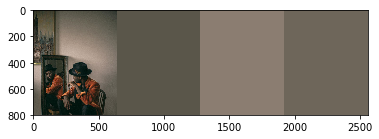

KeyboardInterrupt: 

In [40]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--imagePath", required=True,
# 	help="Path to image to find dominant color of")
# ap.add_argument("-k", "--clusters", default=3, type=int,
# 	help="Number of clusters to use in kmeans when finding dominant color")
# args = vars(ap.parse_args())


for i in glob.glob('./fohrtestimages/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    dom_color_1, dom_color_2, dom_color_3 = get_dominant_color(hsv_image, k=35)
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))
    plt.imshow(output_image)
    plt.show()

In [41]:
dom_color = [94, 98, 88]
print('#%02x%02x%02x' % (int(dom_color[2]), int(dom_color[1]), int(dom_color[0])))

#58625e


Test of getting the Hue Saturation and Value

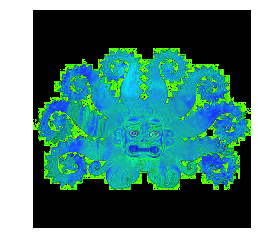

In [44]:
image = cv2.imread('./fohrtestimages/fohrimage.jpg')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [45]:
image.shape

(224, 224, 3)

In [48]:
oriimg = cv2.imread('./fohrtestimages/fohrimage3.jpg',cv2.COLORMAP_HSV)
img = cv2.resize(oriimg,(50,50))

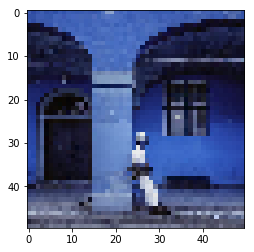

In [49]:
plt.imshow(img)

In [50]:

img = img.reshape((img.shape[0] * img.shape[1], 3))

    #cluster and assign labels to the pixels 
clt = KMeans(n_clusters = 35)
labels = clt.fit_predict(img)

    #count labels to find most popular
label_counts = Counter(labels)

    #subset out most popular centroid
dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]


In [52]:
dominant_color_1

array([15.15025907, 14.20725389, 28.74093264])

In [53]:
label_counts.most_common(3)[1][0]

22

In [54]:
hex1 = '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], dom_color_1_rgb[0][0][1], dom_color_1_rgb[0][0][2])
hex2 = '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], dom_color_2_rgb[0][0][1], dom_color_2_rgb[0][0][2])
hex3 = '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], dom_color_3_rgb[0][0][1], dom_color_3_rgb[0][0][2])

In [55]:
color_dict = {'first_color':{'red': int(dom_color_1_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_1_rgb[0][0][2]), 
'hex': hex1}, 'second_color':{'red': int(dom_color_2_rgb[0][0][0]), 'green':int(dom_color_1_rgb[0][0][1]), 'blue: ': int(dom_color_2_rgb[0][0][2]), 'hex': hex2}, 
              'third_color':{'red': int(dom_color_3_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_3_rgb[0][0][2]), 
'hex': hex3}}

In [56]:
type(color_dict['first_color']['hex'])

str

In [57]:
print(json.dumps(color_dict))

{"first_color": {"red": 90, "green": 86, "blue": 74, "hex": "#5a564a"}, "second_color": {"red": 139, "green": 86, "blue: ": 113, "hex": "#8b7d71"}, "third_color": {"red": 110, "green": 86, "blue": 90, "hex": "#6e665a"}}
